In [5]:
# Import libraries
import glob
import pandas as pd

# Get CSV files list from a folder
path = '../demo_dataset/' 
csv_files = glob.glob(path + "*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = [pd.read_csv(file,skiprows=4,header=None) for file in csv_files]

# Concatenate all DataFrames
big_df = pd.concat(df_list, ignore_index=True)


# print(csv_files)
print(sorted(csv_files))

['../demo_dataset/SERVE_15_03_2023_17-31-49.csv', '../demo_dataset/SERVE_15_03_2023_17-31-49_webcam.csv', '../demo_dataset/SERVE_15_03_2023_17-32-08.csv', '../demo_dataset/SERVE_15_03_2023_17-32-08_webcam.csv', '../demo_dataset/SERVE_15_03_2023_17-32-25.csv', '../demo_dataset/SERVE_15_03_2023_17-32-25_webcam.csv', '../demo_dataset/SERVE_15_03_2023_17-32-39.csv', '../demo_dataset/SERVE_15_03_2023_17-32-39_webcam.csv', '../demo_dataset/SERVE_15_03_2023_17-33-00.csv', '../demo_dataset/SERVE_15_03_2023_17-33-00_webcam.csv', '../demo_dataset/SERVE_15_03_2023_17-33-13.csv', '../demo_dataset/SERVE_15_03_2023_17-33-13_webcam.csv', '../demo_dataset/SERVE_15_03_2023_17-33-43.csv', '../demo_dataset/SERVE_15_03_2023_17-33-43_webcam.csv', '../demo_dataset/SERVE_15_03_2023_17-34-06.csv', '../demo_dataset/SERVE_15_03_2023_17-34-06_webcam.csv', '../demo_dataset/SERVE_15_03_2023_17-34-57.csv', '../demo_dataset/SERVE_15_03_2023_17-34-57_webcam.csv', '../demo_dataset/SERVE_15_03_2023_17-35-21.csv', '../d

In [6]:
df = df_list[0]
df.columns=['IMU','index','Xacc', 'Yacc', 'Zacc', 'Xori', 'Yori', 'Zori', 'Xmag', 'Ymag' , 'Zmag', 'Xgyro', 'Ygyro', 'Zgyro', 'Xrot','Yrot', 'Zrot' , 'Xlin' ,'Ylin', 'Zlin', 'Xgrav', 'Ygrav', 'Zgrav']

In [7]:
df.head()

,IMU,index,Xacc,Yacc,Zacc,Xori,Yori,Zori,Xmag,Ymag,...,Zgyro,Xrot,Yrot,Zrot,Xlin,Ylin,Zlin,Xgrav,Ygrav,Zgrav
0,1,0,0,72,-63,0,0,64,27,-1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,84,-55,-105,39,24,0,0,0,...,0,0,-6,-4,-8,-3,-3,0,0,0
2,1,2,84,-55,-105,39,24,0,0,0,...,0,0,-6,-4,-8,-3,-3,0,0,0
3,1,3,84,-55,-105,39,24,0,0,0,...,0,0,0,0,-8,-3,-3,0,0,0
4,1,4,84,-55,-105,39,19,5,0,0,...,0,0,0,0,-8,-3,-3,0,0,0


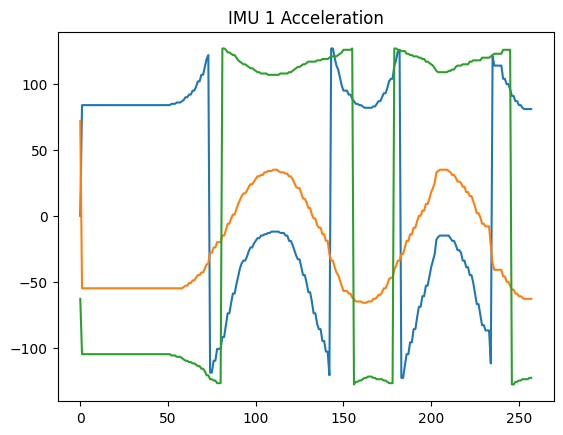

In [8]:
import matplotlib.pyplot as plt

IMU = 1

plt.plot(df.loc[df['IMU'] == IMU]['Xacc'])
plt.plot(df.loc[df['IMU'] == IMU]['Yacc'])
plt.plot(df.loc[df['IMU'] == IMU]['Zacc'])
plt.title(f'IMU {IMU} Acceleration')
plt.show()

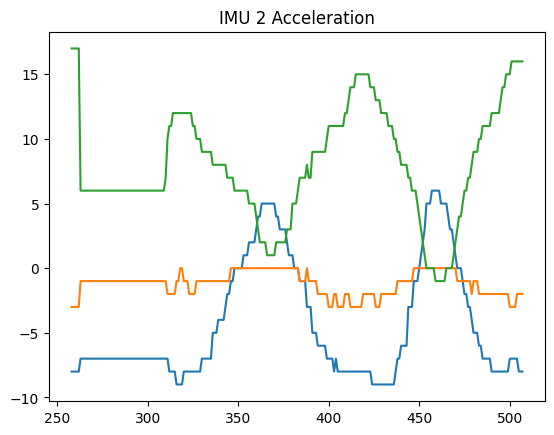

In [9]:
IMU = 2

plt.plot(df.loc[df['IMU'] == IMU]['Xacc'])
plt.plot(df.loc[df['IMU'] == IMU]['Yacc'])
plt.plot(df.loc[df['IMU'] == IMU]['Zacc'])
plt.title(f'IMU {IMU} Acceleration')
plt.show()

In [10]:
df.drop_duplicates()

,IMU,index,Xacc,Yacc,Zacc,Xori,Yori,Zori,Xmag,Ymag,...,Zgyro,Xrot,Yrot,Zrot,Xlin,Ylin,Zlin,Xgrav,Ygrav,Zgrav
0,1,0,0,72,-63,0,0,64,27,-1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,84,-55,-105,39,24,0,0,0,...,0,0,-6,-4,-8,-3,-3,0,0,0
2,1,2,84,-55,-105,39,24,0,0,0,...,0,0,-6,-4,-8,-3,-3,0,0,0
3,1,3,84,-55,-105,39,24,0,0,0,...,0,0,0,0,-8,-3,-3,0,0,0
4,1,4,84,-55,-105,39,19,5,0,0,...,0,0,0,0,-8,-3,-3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2,245,-7,-3,16,-77,-45,19,28,-8,...,0,0,0,0,0,0,9,-7,-2,6
504,2,246,-7,-2,16,-77,-45,18,30,-8,...,0,0,0,0,0,0,9,-7,-2,6
505,2,247,-8,-2,16,-77,-44,18,30,-8,...,0,0,0,0,-1,0,9,-6,-2,6
506,2,248,-8,-2,16,-78,-43,18,32,-8,...,0,0,0,0,-1,0,9,-6,-2,6
